In [21]:
"""
Temporal Difference Learning (TD(0)) Implementation
====================================================

This script implements the Temporal Difference Learning (TD(0)) algorithm for a simple random walk problem.
The state space is represented as a dictionary with state names and their corresponding value estimates.

Functions:
----------
1. `random_walk(state)`: Simulates state transitions and rewards for the random walk.
2. `td_learning(alpha, gamma, max_episodes)`: Implements the TD(0) algorithm with RMS error tracking.
3. `plot_rms_error(rms_errors, alphas, max_episodes)`: Visualizes RMS error over episodes for different learning rates.

Usage:
------
Run the script as a standalone program to observe the learning process and RMS error for various learning rates.

Example:
--------
    python TemporalDifferenceLearning.py
"""
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [22]:
# Define the state space as a dictionary, storing state names and their value estimates
states = {
    'terminal_left': 0.0,
    'A': 0.0,
    'B': 0.0,
    'C': 0.0,
    'D': 0.0,
    'E': 0.0,
    'terminal_right': 1.0
}

In [23]:
def random_walk(state) -> tuple[str, int]:
    """
    Simulates state transitions and rewards for the random walk.

    Parameters
    ----------
    state : str
        The current state of the agent.

    Returns
    -------
    tuple
        A tuple containing:
        - next_state (str): The next state of the agent.
        - reward (int): The reward associated with transitioning to the next state.

    Example
    -------
    >>> next_state, reward = random_walk('C')
    """
    state_keys = list(states.keys())  # Extract state names
    index = state_keys.index(state)
    next_state = np.random.choice([state_keys[index - 1], state_keys[index + 1]])  # 50% probability
    reward = 1 if next_state == 'terminal_right' else 0  # Reward depends on next state
    return next_state, reward

In [34]:
def td_learning(alpha=0.1, gamma=0.9, max_episodes=200) -> tuple[dict, list]:
    """
    Implements the TD(0) learning algorithm with RMS error tracking.

    Parameters
    ----------
    alpha : float, optional
        Learning rate (default is 0.1).
    gamma : float, optional
        Discount factor (default is 0.9).
    max_episodes : int, optional
        Number of episodes to run (default is 200).

    Returns
    -------
    tuple[dict, list]
        A tuple containing:
        - value_function (dict): Estimated value function for each state.
        - rms_error (list): RMS errors over episodes.

    Example
    -------
    >>> value_function, rms_error = td_learning(alpha=0.05, gamma=0.9, max_episodes=1000)
    """
    value_function = {state: 0.0 for state in states}  # Initialize V(s)
    value_function['terminal_right'] = 1.0

    rms_error = []  # Track RMS errors over episodes

    for episode in range(max_episodes):
        # Start the episode from state 'C'
        state = 'C'
        while state not in ['terminal_left', 'terminal_right']:
            # Sample the next state and reward
            next_state, reward = random_walk(state)

            # TD(0) update rule
            td_target = reward + gamma * value_function[next_state]
            td_error = td_target - value_function[state]
            value_function[state] += alpha * td_error

            # Move to the next state
            state = next_state

        # Calculate RMS error for all states after each episode
        rms = np.sqrt(np.mean([(value_function[state] - states[state]) ** 2 for state in states.keys()]))
        rms_error.append(-rms)

    # Print Value Function
    print(f'Value Function after {max_episodes} episodes:')
    for state, value in value_function.items():
        print(f'V({state}) = {value}')

    return value_function, rms_error

In [32]:
def plot_rms_error(rms_errors, alphas, max_episodes) -> None:
    """
    Visualizes the RMS error over episodes for different learning rates.

    Parameters
    ----------
    rms_errors : list of lists
        RMS errors for each learning rate over episodes.
    alphas : list of float
        List of learning rates used in the experiments.
    max_episodes : int
        Number of episodes.

    Returns
    -------
    None

    Example
    -------
    >>> plot_rms_error(rms_errors, alphas=[0.01, 0.03, 0.05], max_episodes=200)
    """
    plt.figure(figsize=(15, 6))
    for alpha, rms in zip(alphas, rms_errors):
        plt.plot(range(max_episodes), rms, label=f'α = {alpha}')
    plt.xlabel('Episodes')
    plt.ylabel('RMS Error')
    plt.title('RMS Error vs Episodes for Different Learning Rates')
    plt.legend()
    plt.grid()
    plt.show()

In [38]:
alphas = [0.01, 0.03, 0.05]  # Different learning rates to compare
gamma = 0.9  # Discount factor
max_episodes = 2000  # Number of episodes

all_value_functions = []
all_rms_errors = []  # Store RMS errors for each learning rate
for alpha in alphas:
    print(f'\nRunning TD(0) Learning with α = {alpha}')
    value_function, rms_error = td_learning(alpha=alpha, gamma=gamma, max_episodes=max_episodes)
    all_value_functions.append(value_function)
    all_rms_errors.append(rms_error)


Running TD(0) Learning with α = 0.01
Value Function after 2000 episodes:
V(terminal_left) = 0.0
V(A) = 0.131281232002
V(B) = 0.2775270474375332
V(C) = 0.47251479357902787
V(D) = 0.7368786229177424
V(E) = 1.3598515567259246
V(terminal_right) = 1.0

Running TD(0) Learning with α = 0.03
Value Function after 2000 episodes:
V(terminal_left) = 0.0
V(A) = 0.11182478203313533
V(B) = 0.24295443734659566
V(C) = 0.4572961528424505
V(D) = 0.779387109388829
V(E) = 1.2694014002321312
V(terminal_right) = 1.0

Running TD(0) Learning with α = 0.05
Value Function after 2000 episodes:
V(terminal_left) = 0.0
V(A) = 0.08135252300601734
V(B) = 0.2297485835453246
V(C) = 0.48606034705365103
V(D) = 0.8068222690497908
V(E) = 1.2656534839633893
V(terminal_right) = 1.0


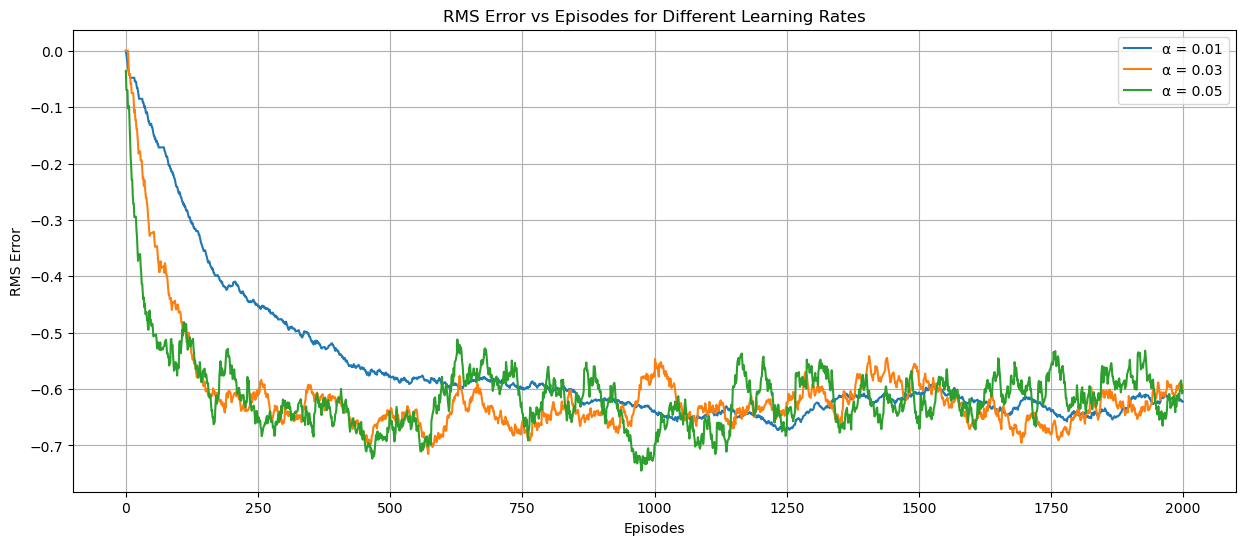

In [39]:
# Plot the RMS error for all learning rates
plot_rms_error(all_rms_errors, alphas, max_episodes)